In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D,Reshape
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.


In [2]:
#读取数据
X_train = pd.read_csv('../preprocessed_data/X_train.csv',header=None).values
X_test = pd.read_csv('../preprocessed_data/X_test.csv',header=None).values

In [3]:
y_train = pd.read_csv('../preprocessed_data/y_train.csv',header=None)
y_test = pd.read_csv('../preprocessed_data/y_test.csv',header=None)

In [4]:
#对于y_train和y_test,值为'normal'的样本标记为0,其它的样本标记为1
y_train = np.where(y_train == 'normal', 0, 1).reshape(-1)
y_test = np.where(y_test == 'normal', 0, 1).reshape(-1)

In [5]:
#对训练集进行随机复制过采样
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=0)
#X_train, y_train = ros.fit_resample(X_train, y_train)

In [6]:
#对y_train和y_test使用sklearn的函数进行one-hot编码
#from sklearn.preprocessing import OneHotEncoder
#合并y_train和y_test
#y = np.concatenate((y_train,y_test))
#enc = OneHotEncoder()
#y = enc.fit_transform(y.reshape(-1,1)).toarray()
#y_train = y[:len(y_train)]
#y_test = y[len(y_train):]

In [7]:
#划分验证集
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [8]:
#构建模型
CNNmodel = Sequential([
    Reshape((X_train.shape[1],1), input_shape=(X_train.shape[1],)),
    Conv1D(32, 12, padding='same', input_shape=(X_train.shape[1],1), activation='tanh'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, 9, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, 6, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Conv1D(256, 3, padding='same', activation='tanh'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(512, activation='tanh'),
    Dropout(0.2),
    Dense(256, activation='tanh'),
    Dropout(0.1),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid'),
])
#编译模型
CNNmodel.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
CNNmodel.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 123, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 123, 32)           416       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 61, 64)            18496     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 30, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 30, 128)           49280     
__________________________

In [9]:
def plotHistory(history):
    # 找到最好的 val_accuracy 和对应的迭代数
    best_val_acc = max(history.history['val_accuracy'])
    best_val_acc_epoch = history.history['val_accuracy'].index(best_val_acc)
    total_epochs = len(history.history['val_accuracy'])
    # 绘制图形
    plt.figure(figsize=(15, 8))
    plt.plot(history.history['val_accuracy'],c = 'g')
    # 添加趋势线
    z1 = np.polyfit(range(0,total_epochs), history.history['val_accuracy'], 4)
    p1 = np.poly1d(z1)
    plt.plot(range(0,total_epochs),p1(range(0,total_epochs)),"r--")
    # 标出最好的 val_accuracy 和对应的迭代数,并注上文字
    plt.scatter(best_val_acc_epoch, best_val_acc, c='b', marker='*', s=100)
    plt.text(best_val_acc_epoch, best_val_acc,f'({best_val_acc:.4f},{best_val_acc_epoch})', ha='center', va='bottom', fontsize=8)
    #plt.title('CNNmodel val_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['validation_acc', 'acc_trend'], loc='upper left')
    plt.gca().spines['top'].set_color('none')
    plt.gca().spines['right'].set_color('none')
    plt.show()

2023-09-26 21:58:07.082022: I tensorflow/stream_executor/platform/default/dso_loader.cc:97] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2023-09-26 21:58:07.082185: I tensorflow/stream_executor/platform/default/dso_loader.cc:97] Successfully opened dynamic library libdxcore.so
2023-09-26 21:58:07.089839: I tensorflow/stream_executor/platform/default/dso_loader.cc:97] Successfully opened dynamic library libd3d12.so
2023-09-26 21:58:09.130294: I tensorflow/core/common_runtime/dml/dml_device_cache.cc:250] DirectML device enumeration: found 1 compatible adapters.
2023-09-26 21:58:09.131378: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-09-26 21:58:09.132353: I tensorflow/core/common_runtime/dml/dml_device_cache.cc:186] DirectML: creating device on adapter 0 (AMD Radeon RX 6600M)



Train on 100778 samples, validate on 25195 samples
Epoch 1/15
100778/100778 [==============================] - 7s 65us/step - loss: 0.0346 - accuracy: 0.9882 - val_loss: 0.0169 - val_accuracy: 0.9935
Epoch 2/15
100778/100778 [==============================] - 6s 61us/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0200 - val_accuracy: 0.9951
Epoch 3/15
100778/100778 [==============================] - 6s 61us/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0146 - val_accuracy: 0.9955
Epoch 4/15
100778/100778 [==============================] - 6s 61us/step - loss: 0.0088 - accuracy: 0.9968 - val_loss: 0.0162 - val_accuracy: 0.9942
Epoch 5/15
100778/100778 [==============================] - 6s 61us/step - loss: 0.0108 - accuracy: 0.9962 - val_loss: 0.0077 - val_accuracy: 0.9970
Epoch 6/15
100778/100778 [==============================] - 6s 61us/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0090 - val_accuracy: 0.9974
Epoch 7/15
100778/100778 [============================

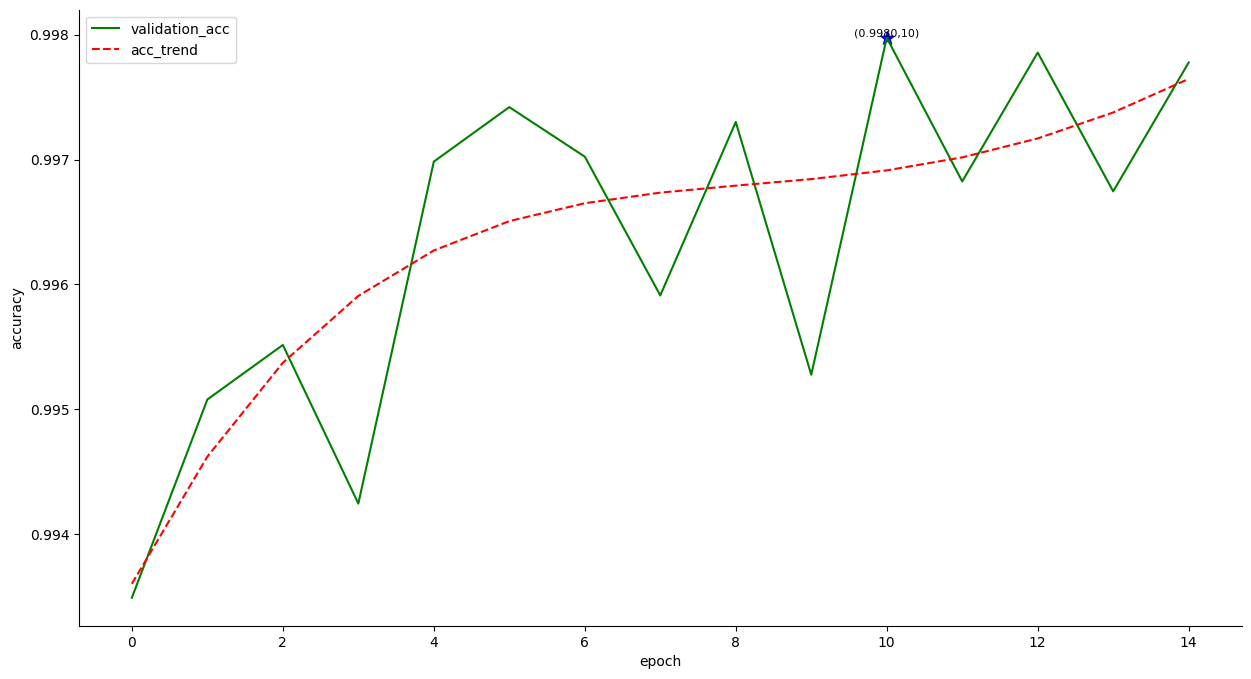

In [10]:
#训练模型
history = CNNmodel.fit(X_train, y_train, epochs=15, batch_size=256, validation_data=(X_val, y_val))#10;256
plotHistory(history)

In [11]:
#评估模型
CNNmodel.evaluate(X_test, y_test, batch_size=128)

  128/22544 [..............................] - ETA: 1s

22544/22544 [==============================] - 1s 30us/step


[0.7627043608004972, 0.8507363200187683]

In [12]:
#读取模型
#CNNmodel = load_model('CNNmodel.keras')

In [13]:
#预测
y_pred = CNNmodel.predict(X_test)


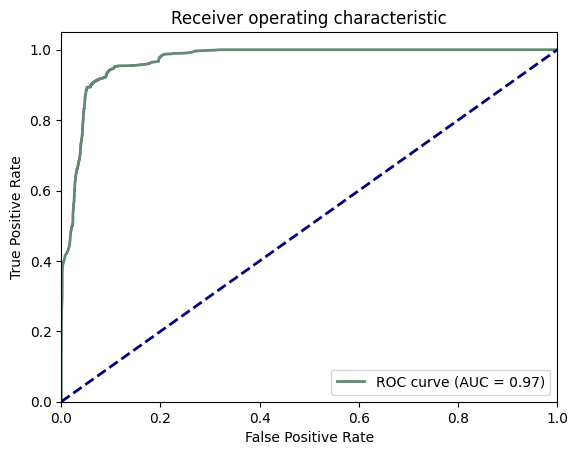

In [14]:

# 计算ROC曲线和AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='#648872', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
y_pred = np.where(y_pred > 0.5, 1, 0).reshape(-1)

In [16]:
#评估
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('precision_score:',precision_score(y_test, y_pred))
print('recall_score:',recall_score(y_test, y_pred))
print('f1_score:',f1_score(y_test, y_pred))

accuracy_score: 0.850736337828247
precision_score: 0.9597009127986017
recall_score: 0.7701238993220603
f1_score: 0.8545242315507328


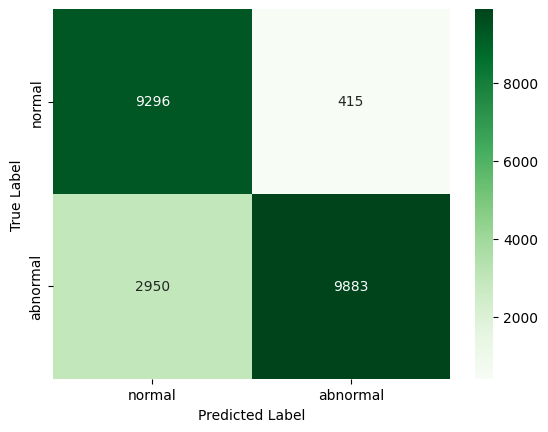

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
#保存模型
CNNmodel.save('CNNmodel.keras')